<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Modeling And Simulation   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 5: Solving Problems with Monte-Carlo Simulation Technique
In this Notebook you learn how to apply  Monte-Carlo (MC) Method to solve some problems. The methode provides generally approximate solutions to problems that are hard to solve analytically or numerically. Many of the functions we will use are implemented with the uses of pseudo-random numbergenerators. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1- The Probabilistic Basis for Monte-Carlo:  
#### Law of Large Numbers (LLN)
We want to estimate the quantity of the mean of a given set of random variables $X$. We denote the estimated mean by  $\hat{\mu}_n$ and the true mean by $\mu = E[X]$.

The LLN states that the more random trials that are performed, the more accurate the approximated quantity $\hat{\mu}_n$ will become:
$ 
\hat{\mu}_n= \lim_{{n\to\infty}} \left(\frac {1}{n} \sum_{k=1}^n X_k \right) \xrightarrow{} \mu
 $

The following example shows an estimation of the mean value of a set of random variables generated from an uniform destribution $U[a,b]$

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\2401662798.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\2401662798.py:22: SyntaxWarning: invalid escape sequence '\h'
  axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$'


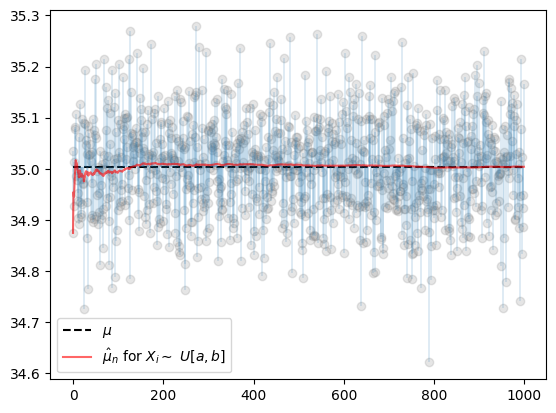

In [5]:
N = 1000
estimated_means,data = np.zeros(N),np.zeros(N)
a,b=30,40
for i in range(N):
  
    #for each itteration, generate the mean of N samples from an uniform destribution U[a,b] 
    data[i] = np.random.uniform(a, b, N).mean() #generate 1000 num between 30 and 40 and calculated the mean
    #for each itteration, estimate the mean
    estimated_means[i] = np.mean(data[:i+1]) #the mean of the means collected so far!
   
    
#get the true mean of data    
μ= data.mean()

#generate x data axis
x=np.arange(N)

# Plotting
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ, data, lw=0.2)
plt.scatter(x, data, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means, 'r-',  alpha=0.6, label=axlabel)

plt.legend()
plt.show()
#after generating 1000 random nums between 30 and 40 we calculated 10000 times the mean and after having 1000 means we calculated the final mean of these 1000 means  

Now, try to change the N value by making it bigger for the code above and execute again the code. 

 In Statistics, theory tells us  that the difference of $\hat{\mu}_n$ from $\mu$ should be of order $\frac{\sigma}{\sqrt{n}}$.
 In other words:
  $ 
|\hat{\mu}_n- \mu| \approx \frac{\sigma}{\sqrt{n}}
 $
 
 Let's confirm that throught plotting the erroe:

<ipython-input-3-764081a8a511>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x,sigma/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")


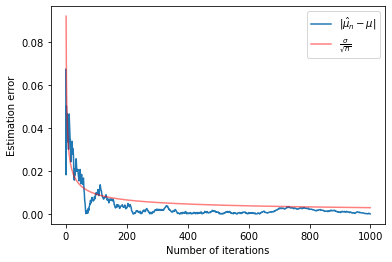

In [3]:
sigma= data.std()
plt.plot(x, np.abs(estimated_means-μ), label='$|\hat{\mu}_n- \mu|$')
plt.plot(x,sigma/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error")
plt.legend()
plt.show()


### Challenge 01:
Change the codes above to estimate the mean value of a set of random variables that are generated from:
<ol type = "1">
         <li>An exponential destribution  with $λ = 1.5$.   </li>
         <li>A binomial destribution with $n=10$ trials and $p=0.5$ probability of success</li>     
</ol>

Plot also the absolute error for the two case studies.
#### Hint:
<ul>
<li>Recall that the probability density functionan of an exponantial distribution is defined by the following equatin:
$P(x) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$, where $λ=\frac{1}{\beta}$.
The exponantial distribution can be generated using the numpy python function: `numpy.random.exponential(scale=1.0, size=None)`, where `scale=λ`.
<li>The probability density for the binomial distribution is given as follows:
$P(N) = \binom{n}{N}p^N(1-p)^{n-N}$. The binomial distribution can be generated using the numpy python function: `numpy.random.binomial(n, p, size=None)`.
</ul>




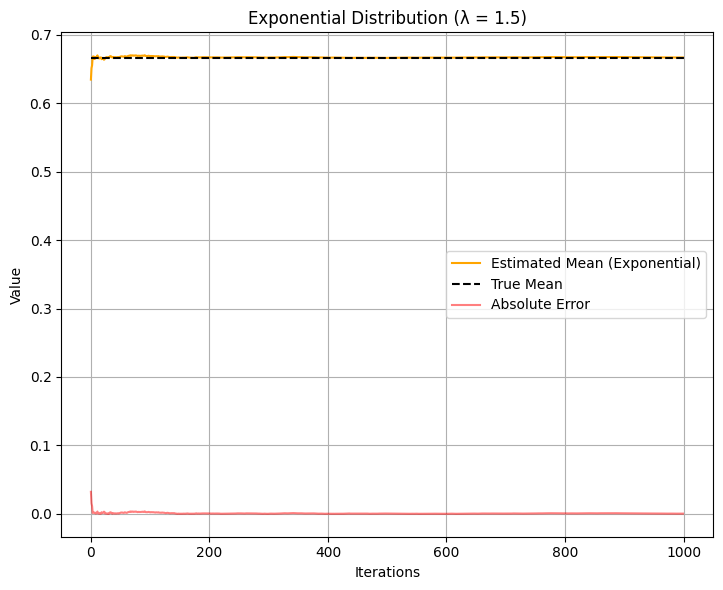

In [2]:
# Simulation size
N = 1000

# --- Case 1: Exponential Distribution (λ = 1.5) ---
lambda_exp = 1.5
true_mean_exp = 1 / lambda_exp
estimated_means_exp = np.zeros(N)
data_exp = np.zeros(N)

for i in range(N):
    data_exp[i] = np.random.exponential(scale=1 / lambda_exp, size=N).mean() #generating 1000 random value and calculating the mean
    estimated_means_exp[i] = np.mean(data_exp[:i+1]) #mean of means collected so far 

absolute_error_exp = np.abs(estimated_means_exp - true_mean_exp)



# --- Plotting Results ---
x = np.arange(N)

plt.figure(figsize=(14, 6))

# Exponential plot
plt.subplot(1, 2, 1)
plt.plot(x, estimated_means_exp, label='Estimated Mean (Exponential)', color='orange')
plt.hlines(true_mean_exp, 0, N, colors='k', linestyles='--', label='True Mean')
plt.plot(x, absolute_error_exp, label='Absolute Error', color='red', alpha=0.5)
plt.title('Exponential Distribution (λ = 1.5)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()


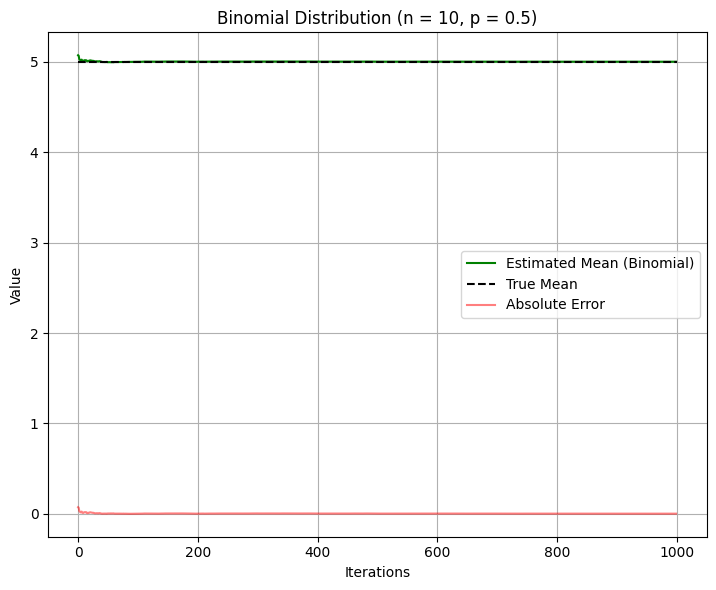

In [9]:
# --- Case 2: Binomial Distribution (n = 10, p = 0.5) ---
n_binom = 10
p_binom = 0.5
true_mean_binom = n_binom * p_binom
estimated_means_binom = np.zeros(N)
data_binom = np.zeros(N)

for i in range(N):
    data_binom[i] = np.random.binomial(n_binom, p_binom, size=N).mean()
    estimated_means_binom[i] = np.mean(data_binom[:i+1])

absolute_error_binom = np.abs(estimated_means_binom - true_mean_binom)

# --- Plotting Results ---

x = np.arange(N)

plt.figure(figsize=(14, 6))

# Binomial plot
plt.subplot(1, 2, 2)
plt.plot(x, estimated_means_binom, label='Estimated Mean (Binomial)', color='green')
plt.hlines(true_mean_binom, 0, N, colors='k', linestyles='--', label='True Mean')
plt.plot(x, absolute_error_binom, label='Absolute Error', color='red', alpha=0.5)
plt.title('Binomial Distribution (n = 10, p = 0.5)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

#### The Central Limit Theorem (CLT):
The central limit theorem states that the distribution of independent sample means is an approximately normal distribution, even if the population is not normally distributed.
In oder wards, in CLT, given a dataset with an unknown distribution, the sample’s means will approximate the normal distribution.

$ 
\hat{\mu}_n \xrightarrow{n \to \infty}  \mathcal{N}\left(\mu,\sigma^2/n\right) \Longleftrightarrow \left(Z=\frac{\hat{\mu}_n - \mu}{ \sigma/\sqrt{n}}\right) \xrightarrow{n \to \infty}  \mathcal{N}(0,1)
 $


In [14]:
import seaborn as sns

l="$N$({0:.2f},{1})".format(μ,sigma*sigma/N)
sns.distplot(estimated_means, label=l)
plt.legend()



NameError: name 'sigma' is not defined

### Challenge 02:
Plot the density distributions of the estimated means calculated previously using the exponential and the binomial distributions to testify the central limit theorem (CLT) 

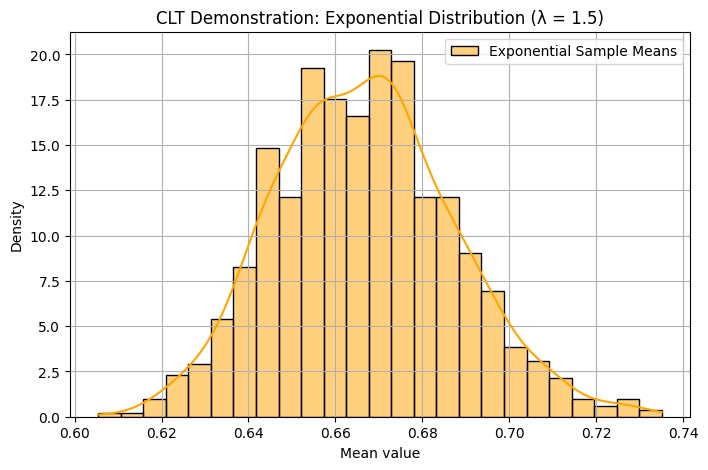

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
N = 1000
sample_size = 1000
exp_means = np.zeros(N)

# Exponential Distribution: scale = 1/λ = 0.666...
scale = 1 / 1.5

for i in range(N):
    exp_means[i] = np.random.exponential(scale=scale, size=sample_size).mean()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(exp_means, kde=True, color='orange', stat="density", label='Exponential Sample Means')
plt.title("CLT Demonstration: Exponential Distribution (λ = 1.5)")
plt.xlabel("Mean value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


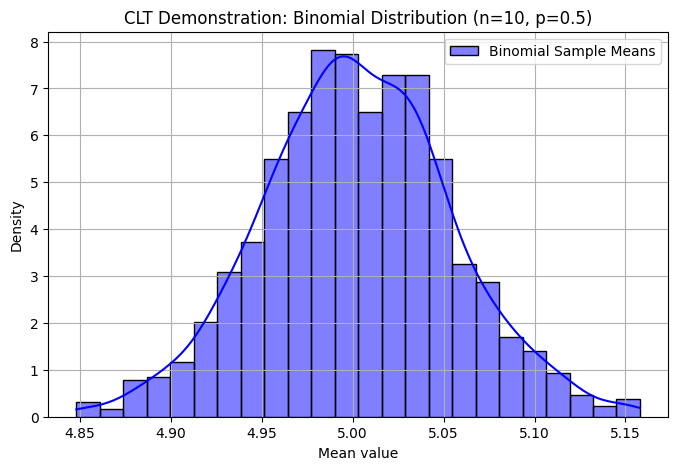

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
N = 1000
sample_size = 1000
binom_means = np.zeros(N)

# Binomial Distribution
for i in range(N):
    binom_means[i] = np.random.binomial(n=10, p=0.5, size=sample_size).mean()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(binom_means, kde=True, color='blue', stat="density", label='Binomial Sample Means')
plt.title("CLT Demonstration: Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Mean value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


#### Illustration of Confidence Interval
From Statistic theory,  $95\%$ of the time, $\hat{\mu}_n$ will be within $1.96 \frac{\sigma}{\sqrt{n}}$
from $\mu$.

Alternatively, for $95\%$ of the time, $\mu$ will be within $1.96 \frac{\sigma}{\sqrt{n}}$
from $\hat{\mu}_n$.

Hence, we call the interval:
 $
     \hat{\mu}_n \pm 1.96 \frac{\sigma}{\sqrt{n}}=\left[ \hat{\mu}_n-1.96 \frac{\sigma}{\sqrt{n}}, \hat{\mu}_n+1.96 \frac{\sigma}{\sqrt{n}} \right]
 $

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\%'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\%'
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\107451005.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\107451005.py:23: SyntaxWarning: invalid escape sequence '\h'
  axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$'
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\107451005.py:25: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(x, (estimated_means-ci), (estimated_means+ci), color='r', alpha=0.1, label=" $95\%$ CI for $\hat{\mu}_n$ ")


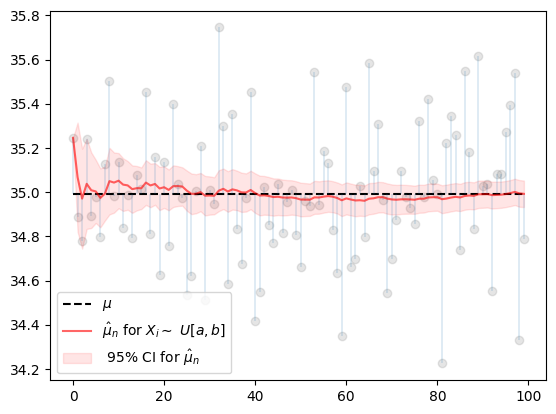

In [17]:
N = 100
estimated_means,data,ci = np.empty(N), np.zeros(N),np.zeros(N)
a,b=30,40
for i in range(N):
  
    #for each itteration, generate the mean of N samples from an uniform destribution U[a,b] 
    data[i] = np.random.uniform(a, b, N).mean()
    #for each itteration, estimate the mean
    estimated_means[i] = np.mean(data[:i+1])
    #Compute confidence interval ci
    ci[i] = 1.96 * np.std(data[:i+1]) / np.sqrt(i+1)
    
#get the true mean of data    
μ= data.mean()

#generate x data axis
x=np.arange(N)

# Plotting
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ, data, lw=0.2)
plt.scatter(x, data, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means, 'r-',  alpha=0.6, label=axlabel)
plt.fill_between(x, (estimated_means-ci), (estimated_means+ci), color='r', alpha=0.1, label=" $95\%$ CI for $\hat{\mu}_n$ ")

#upper = np.percentile(estimated_means, [97.5]*N)
#plt.plot(x, upper, 'b');

plt.legend()
plt.show()


### Challenge 03:
Illustrate the confidenc interval for the estimated means calculated previously using the exponential and the binomial distributions  

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\2665511640.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\2665511640.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(x, estimated_means, 'r-', alpha=0.8, label='$\hat{\mu}_n$ for Exp($\lambda$=1.5)')


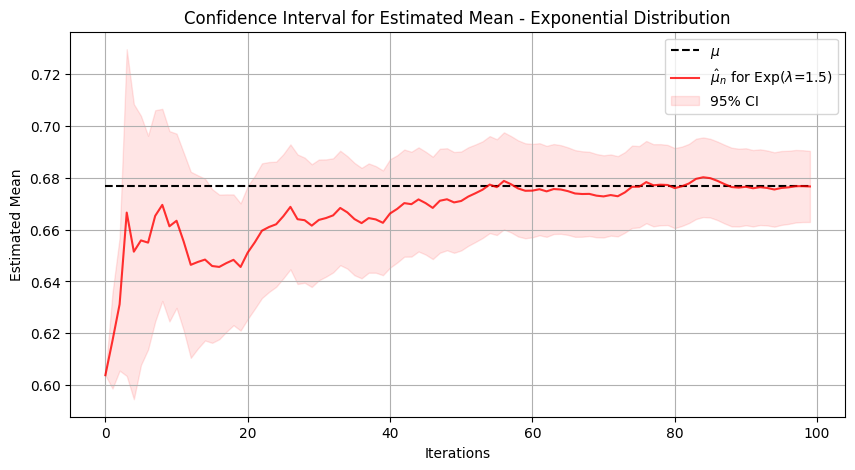

In [18]:
# Parameters
N = 100
λ = 1.5
scale = 1 / λ

# Initialization
estimated_means = np.zeros(N)
data = np.zeros(N)
ci = np.zeros(N)

for i in range(N):
    samples = np.random.exponential(scale=scale, size=N)
    data[i] = samples.mean()
    estimated_means[i] = np.mean(data[:i+1])
    ci[i] = 1.96 * np.std(data[:i+1]) / np.sqrt(i+1)

μ = data.mean()
x = np.arange(N)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.plot(x, estimated_means, 'r-', alpha=0.8, label='$\hat{\mu}_n$ for Exp($\lambda$=1.5)')
plt.fill_between(x, estimated_means - ci, estimated_means + ci, color='r', alpha=0.1, label="95% CI")
plt.title("Confidence Interval for Estimated Mean - Exponential Distribution")
plt.xlabel("Iterations")
plt.ylabel("Estimated Mean")
plt.legend()
plt.grid(True)
plt.show()


<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\h'
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\1709059678.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\1709059678.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(x, estimated_means, 'b-', alpha=0.8, label='$\hat{\mu}_n$ for Binomial(n=10, p=0.5)')


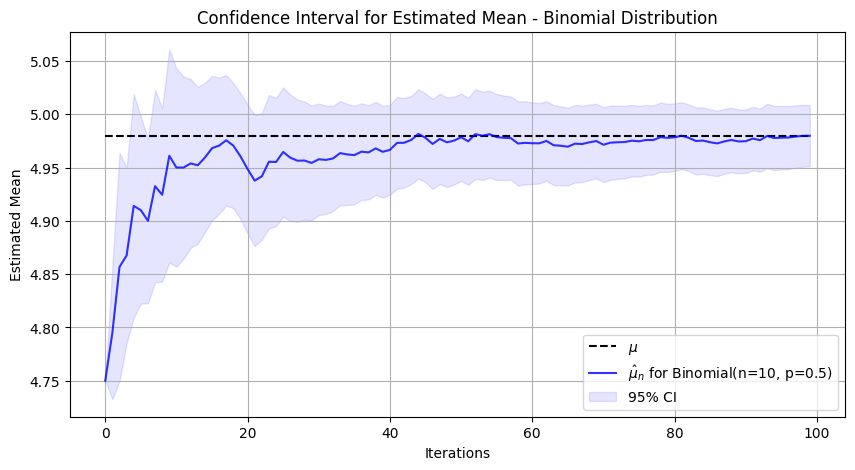

In [19]:
# Parameters
N = 100
n_trials = 10
p = 0.5

# Initialization
estimated_means = np.zeros(N)
data = np.zeros(N)
ci = np.zeros(N)

for i in range(N):
    samples = np.random.binomial(n_trials, p, size=N)
    data[i] = samples.mean()
    estimated_means[i] = np.mean(data[:i+1])
    ci[i] = 1.96 * np.std(data[:i+1]) / np.sqrt(i+1)

μ = data.mean()
x = np.arange(N)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.plot(x, estimated_means, 'b-', alpha=0.8, label='$\hat{\mu}_n$ for Binomial(n=10, p=0.5)')
plt.fill_between(x, estimated_means - ci, estimated_means + ci, color='b', alpha=0.1, label="95% CI")
plt.title("Confidence Interval for Estimated Mean - Binomial Distribution")
plt.xlabel("Iterations")
plt.ylabel("Estimated Mean")
plt.legend()
plt.grid(True)
plt.show()


### 2- Applications of Monte-Carlo Simulation Technique

### 2.1- Pi Estimation 

<figure>
  <IMG src="figures/pi.png" WIDTH=150 height="150" ALIGN="right">
</figure>
<ul>
<li>The area of the circle is $\pi r^2$,
<li>The area of the square is $width^2 = (2r)^2 = 4r^2$.

<li>If we divide the area of the circle, by the area of the square we get $\pi/4$.

<li>The same ratio can be used between the number of points within the square and the number of points within the circle. Hence to estimate $\pi$ can be estimated as follows:
</ul>    
      $\pi$ ≈ 4 x (number of points in the circle / total number of points)

 The code below simulate the steps on estimating the value of $\pi$ using Monte-Carlo Simulation Technique:

In [ ]:
import numpy as np
np.random.seed(42) 
N = 10000
inside = [] #table to store points inside the circle
outside = [] # // // // outside // //

points = np.random.uniform(-1, 1, size=(N,2)) #generation of 10000 point each one with 2 coordinates
for point in points:   
    x = point[0]
    y = point[1]
    
    if (np.sqrt(x**2 + y**2)) < 1:
        inside.append((x, y))
    else:
        outside.append((x, y))

pi = 4*len(inside) /  len(points) # calculating p (proba of inside/outside = P/4 --> p = 4 * (proba of inside/outside)
print("Proportion  inside: {:.9f}".format(pi))

Proportion  inside: 3.154400000


And the graphical plot solution is as follows:

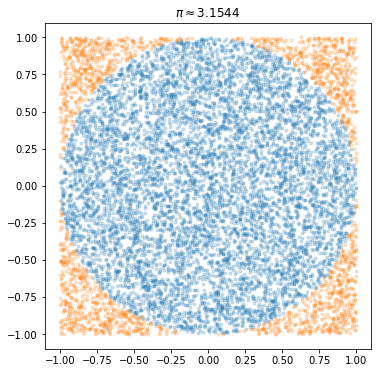

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.2);
plt.scatter([x[0] for x  in outside], [x[1] for x  in outside], marker=".", alpha=0.2);
plt.title('$\pi\\approx' + str(pi) + '$')
plt.gca().set_aspect('equal', adjustable='box')

No try to make the number of the value N bigger and see how the value of $\pi$ will approximate the true value once N is much bigger.

### Challenge 04:
Estimate the area of a rectangle of width=3 and hight=2 using a Monte-Carlo Simulation Technique.

#### Hint
<ul>
<li>Generate a sequence of $N=10000$ independent random points with a square of $4x4$ area centred at the origin.
<li>Compute the number of points ($R$) that are inside the rectangle.
<li>Then, the area of the rectangle $A\approx Square_{area}*\frac{R}{N}$ 
 </ul> 


In [ ]:
# Set the random seed for reproducibility

# Number of points to generate
N = 10000

# Initialize counters
inside_rectangle = 0

# Generate N random points in the square [-2, 2] x [-2, 2]
points = np.random.uniform(-2, 2, size=(N, 2))

# Define the rectangle's bounds: width = 3, height = 2, centered at the origin
width = 3
height = 2

#calculating max x, and y so the points should have to be inside the rectangle
x_min, x_max = -width / 2, width / 2 #width of the rectangle -1.5 to 1.5 
y_min, y_max = -height / 2, height / 2 #height of the rectangle from -1 to 1

# Check how many points fall inside the rectangle
for point in points:
    x, y = point
    if x_min <= x <= x_max and y_min <= y <= y_max:
        inside_rectangle += 1

# Calculate the estimated area of the rectangle
square_area = 4 * 4  # The area of the square [-2, 2] x [-2, 2]
area_estimate = square_area * inside_rectangle / N  

# Output the result
print(f"Estimated area of the rectangle: {area_estimate:.4f}")


Estimated area of the rectangle: 6.0080


### Challenge 05:
Using Monte-Carlo Simualtion Technique, estimate the surface delimited by the solid line as depicted in the following Figure:

<figure>
  <IMG src="figures/pool.png" WIDTH=250 height="100" ALIGN="right">
</figure>



In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of random points
N = 10000

# Bounds of the box
x_min, x_max = -0.75, 0.75
y_min, y_max = -1, 1  # Because max |cos(x)| = 1

# Generate random points in the box
x_rand = np.random.uniform(x_min, x_max, N)
y_rand = np.random.uniform(y_min, y_max, N)

# Count how many points fall between -cos(x) and cos(x)
inside = np.abs(y_rand) <= np.cos(x_rand)
count_inside = np.sum(inside)

# Monte Carlo estimation
box_area = (x_max - x_min) * (y_max - y_min)  # 1.5 * 2 = 3.0
estimated_area = box_area * (count_inside / N)

# Output the result
print(f"Estimated surface area using Monte Carlo: {estimated_area:.2f}")

Estimated surface area using Monte Carlo: 2.72


### 2.2- Integral Estimation 
<figure>
  <IMG src="figures/integrals.png" WIDTH=250 height="100" ALIGN="right">
</figure>
Monte-Carlo Technique can be also used to estimae Integrals: $\int_I f(x) dx$ by following the steps below:

<ul>
<li> Sample points within $\int_I f(x) dx$
<li> Calculate the mean of the random variable within $I$
<li> Integral = sampled area × mean
  </ul> 

#### Example 01: Estimating $\int_{1}^5 x^2 dx$
    The general solution can be found using sympy as follows:

In [28]:
import sympy as sy
x = sy.Symbol("x")
i = sy.integrate(x**2) 
i.subs(x, 5) - i.subs(x, 1)
float(i.subs(x, 5) - i.subs(x, 1))

41.333333333333336

And the estimated value using Monte-Carlo simulation technique is:

In [17]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(1, 5)
    accum += x**2
area = 5-1
integral = area*accum/float(N)
print(integral)

41.31128313471134


 #### Example 02: Estimating $\int_{1}^3 e^{x^2} dx$
 The general solution can be found using sympy as follows:

In [29]:
x = sy.Symbol("x")
i = sy.integrate(sy.exp(x**2)) 
i.subs(x, 3) - i.subs(x, 1) 
float(i.subs(x, 3) - i.subs(x, 1))

1443.082471146807

And the estimated value using Monte-Carlo simulation technique is:

In [19]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(1, 3)
    accum += np.exp(x**2)
area = 3 - 1
integral = area * accum / float(N)
print(integral)

1455.579398375086


#### Example 03: Estimating the double integral $\int_{0}^1 \int_{4}^6 cos(x^4)+ 3y^2 dx dy$
The general solution can be found using sympy as follows:

In [20]:
x = sy.Symbol("x")
y = sy.Symbol("y")
d1 = sy.integrate(sy.cos(x**4) + 3 * y**2, x)
d2 = sy.integrate(d1.subs(x, 6) - d1.subs(x, 4), y) 
sol = d2.subs(y, 1) - d2.subs(y, 0)
float(sol)

2.005055086749674

In [30]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(4, 6)
    y = np.random.uniform(0, 1)
    accum += np.cos(x**4) + 3 * y * y
volume = (6-4) * (1-0)
integral = volume * accum/float(N)
print(integral)

2.0099202837687136


### Challenge 6:
Estimate the following Integrals using Monte-Carlo Simulation Technique:

<ol type = "1">
 <li> $\int_{0}^4 (x *\cos (7x) + \sin (13x)) dx $
 <li>$\int_{2}^8 \int_{1}^5 (\frac{x}{\sqrt(x^2-1)}+ x * y^3)  dxdy $
 <li>$\int_{0}^5 \int_{2}^4 \int_{1}^3 (x^3 - y^2 + z)  dxdydz $
</ol>
 

In [3]:
N = 1000000  # Large number for better accuracy

# 1. 1D Integral
def f1(x):
    return x * np.cos(7 * x) + np.sin(13 * x)

x1 = np.random.uniform(0, 4, N)
integral1 = 4 * np.mean(f1(x1))
print(f"Integral 1 ≈ {integral1}")

# 2. 2D Integral
def f2(x, y):
    return x / np.sqrt(x**2 - 1) + x * y**3

x2 = np.random.uniform(2, 8, N)
y2 = np.random.uniform(1, 5, N)
area2 = (8 - 2) * (5 - 1)
integral2 = area2 * np.mean(f2(x2, y2))
print(f"Integral 2 ≈ {integral2}")

# 3. 3D Integral
def f3(x, y, z):
    return x**3 - y**2 + z

x3 = np.random.uniform(0, 5, N)
y3 = np.random.uniform(2, 4, N)
z3 = np.random.uniform(1, 3, N)
volume3 = (5 - 0) * (4 - 2) * (3 - 1)
integral3 = volume3 * np.mean(f3(x3, y3, z3))
print(f"Integral 3 ≈ {integral3}")


Integral 1 ≈ 0.20979942939500792
Integral 2 ≈ 4705.511470875429
Integral 3 ≈ 478.3227705233579


### 2.3- Monte-Carlo Applications  to Uncertainty Analysis

Uncertainty Analysis investigates the uncertainty of variables that are used in decision-making problems.
The goal is to:
<ul>
<li>Quantify uncertainties propagated in models variables.
<li>Understand and model it to make better decisions
 </ul> 
 
#### Example:
Let $X$ be a measure uniformly distributed over $[-100, 100]$  and $Y$ another measure exponentially distributed with $\beta=2.25$. We are interested in the distribution of the output variable:
    $
     Z= X*Y
  $

C:\Users\raouf\AppData\Local\Temp\ipykernel_3656\958909727.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim)


<Axes: ylabel='Density'>

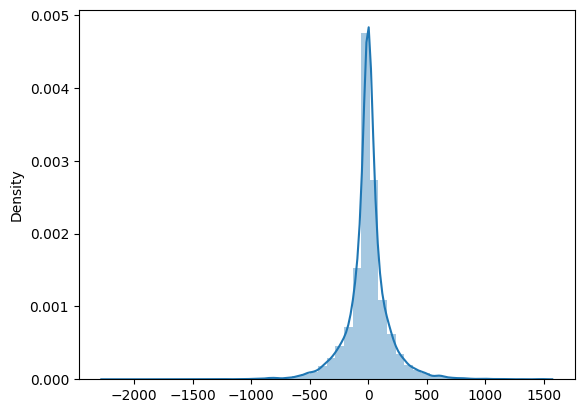

In [32]:
import  numpy as np
N = 10000
def Z():
    x = np.random.uniform(-100, 100)
    y = np.random.exponential(2.25)
    return x * y

sim = np.zeros(N) 
for i in range(N):
    sim[i] = Z()
    
sns.distplot(sim)

Note that the output result approximate a normal distribution

### Challenge 7:
The body mass index ($BMI$) is the ratio $\frac{Body_{mass}(𝑘𝑔)}{body_{height} (𝑚^2)}$ 
This ratio is often used as an indicator of obesity or mal nutrition.
#### Task:
Calculate your $BMI$ and the associated uncertainty interval, assuming:
<ul>
<li>your weight scale tells you that you weigh $84$ $kg$ (precision shown to the nearest kilogram)
<li>    a tape measure says you are between $181$ and $182$ cm tall(most likely value is $181.5$ cm)
</ul> 
What is your observation on the resulting output?

#### Hint:
Modify the code above to run a Monte-Carlo simulation on the model $BMI$ with
<ul>
<li> $Body_{mass}$ drawn froma $𝑈(83.5,84.5)$ uniform distribution.
<li> $body_{height}$ drawn froma $𝑇(1.81,1.815,1.82)$ triangular distribution (np.random.triangular(left, mode, right, size=None)).    
</ul> 

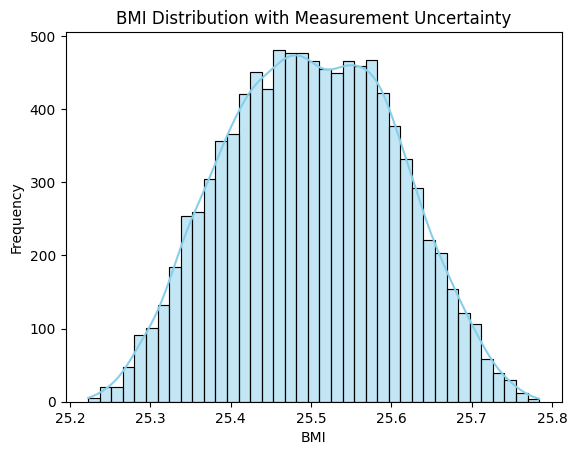

Estimated BMI: 25.50 ± 0.10
95% Uncertainty Interval: [25.30, 25.70]


In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

N = 10000  # number of simulations

# Generate random weights (uniform distribution)
weights = np.random.uniform(83.5, 84.5, N)

# Generate random heights (triangular distribution)
heights = np.random.triangular(1.81, 1.815, 1.82, N)

# Compute BMI for each sample
bmi = weights / (heights ** 2)

# Plot the distribution
sns.histplot(bmi, kde=True, color='skyblue')
plt.title("BMI Distribution with Measurement Uncertainty")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
mean_bmi = np.mean(bmi)
std_bmi = np.std(bmi)
lower = np.percentile(bmi, 2.5)
upper = np.percentile(bmi, 97.5)

print(f"Estimated BMI: {mean_bmi:.2f} ± {std_bmi:.2f}")
print(f"95% Uncertainty Interval: [{lower:.2f}, {upper:.2f}]")
